<a href="https://colab.research.google.com/github/Elaheh-P/Heart_Disease_Deeplearnig/blob/main/HeartDisease_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/DL/heart.csv')


Mounted at /content/drive


In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
import warnings

warnings.filterwarnings('ignore')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [9]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [10]:
df.shape

(918, 12)

In [11]:
# checking to see if there are any missing values
print(df.isna().any().any())

False


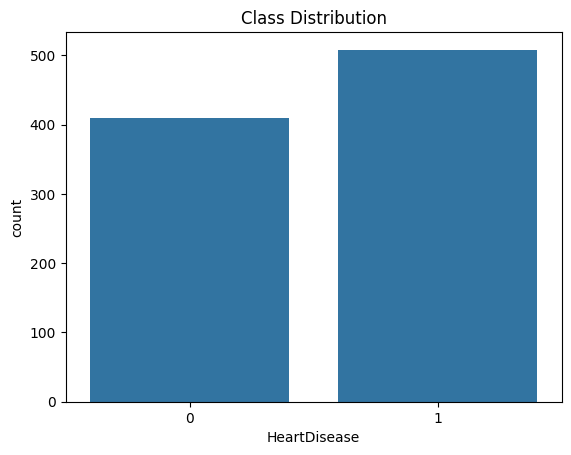

In [31]:
# Visualize class distribution
sns.countplot(x='HeartDisease', data=df)
plt.title("Class Distribution")
plt.show()

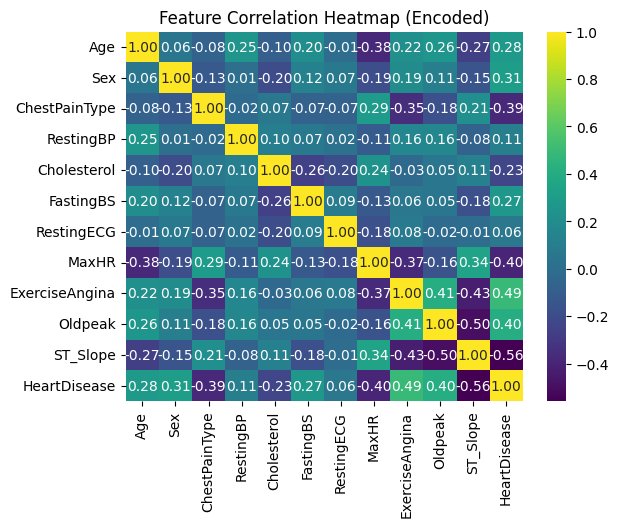

In [32]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', cmap='viridis')
plt.title("Feature Correlation Heatmap (Encoded)")
plt.show()

We see that ExerciseAngina , Sex , and Oldpeak have a moderate correlation with heart disease.

In [33]:
df_encoded.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


#Individual Distributions of ExerciseAngina, Sex, and Oldpeak

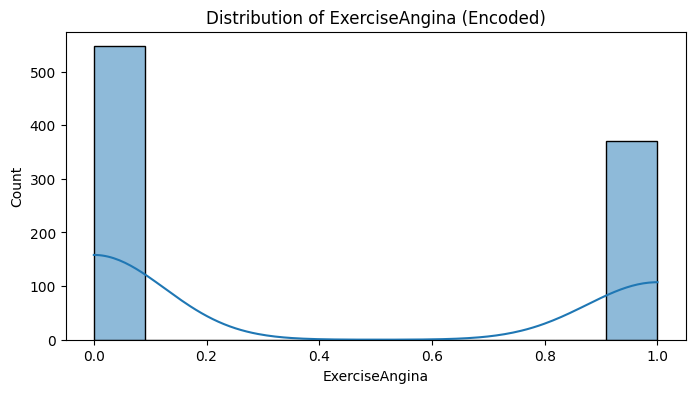

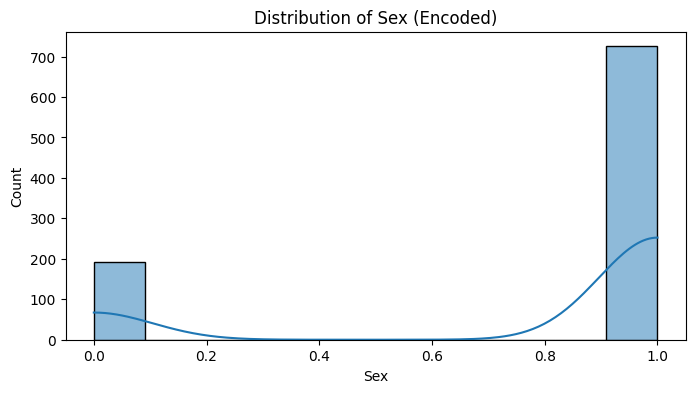

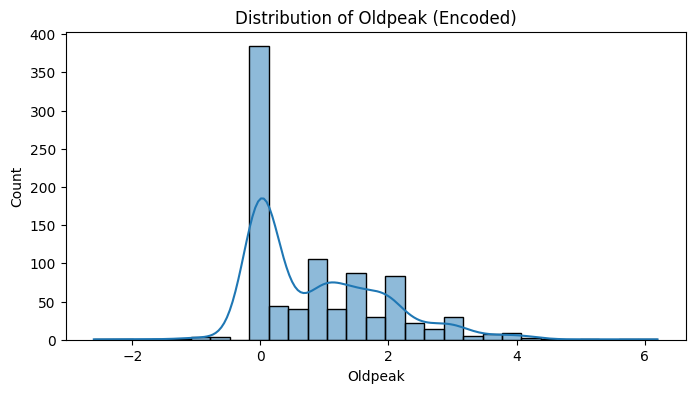

In [43]:
df_encoded.columns = df_encoded.columns.str.strip()  # removes extra spaces
features = ['ExerciseAngina', 'Sex', 'Oldpeak']

# Plot each feature
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_encoded[feature], kde=True)  # kde=True adds smooth curve
    plt.title(f'Distribution of {feature} (Encoded)')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


*   Majority do not have angina during exercise.
*   Dataset has more males than females.
*   Most patients have low Oldpeak, a few have large values.






# Preprocessing

In [44]:
x = df_encoded.drop('HeartDisease' , axis= 'columns')
y = df_encoded['HeartDisease']


In [45]:
x.shape

(918, 11)

In [46]:
y.shape

(918,)

In [47]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


# Model Definition

In [48]:

from tensorflow import keras

def create_model():
  model = keras.Sequential()

  model.add(keras.layers.Input(shape = (11,)))
  model.add(keras.layers.Dense(units= 64, activation='relu'))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(units = 32, activation='relu'))

  model.add(keras.layers.Dense(units= 1, activation='sigmoid'))

  model.compile(optimizer = 'adam' , loss= 'binary_crossentropy' , metrics = ['accuracy'])

  return model


In [49]:
model = create_model()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_no = 1
acc_per_fold = []
loss_per_fold = []

for train_idx, val_idx in kfold.split(x, y):
    print(f"\n🔁 Training Fold {fold_no}...")

    # Split data
    x_train, x_val = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Normalize (fit only on training data to avoid data leakage)
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_val = scaler.transform(x_val)

    # Model
    model = create_model()

    # Early stopping
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=10, restore_best_weights=True)

    # Train
    hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=128, callbacks=[early_stop], verbose=0)

    # Evaluate
    scores = model.evaluate(x_val, y_val, verbose=0)
    print(f"✅ Fold {fold_no} - Validation Loss: {scores[0]:.4f} | Accuracy: {scores[1]*100:.2f}%")

    # Store metrics
    loss_per_fold.append(scores[0])
    acc_per_fold.append(scores[1])
    fold_no += 1

# Final results
print("\n📊 Cross-Validation Results:")
for i in range(len(acc_per_fold)):
    print(f"Fold {i+1}: Loss = {loss_per_fold[i]:.4f} | Accuracy = {acc_per_fold[i]*100:.2f}%")

print(f"\n✅ Average Accuracy: {np.mean(acc_per_fold)*100:.2f}%")
print(f"📉 Average Loss: {np.mean(loss_per_fold):.4f}")


🔁 Training Fold 1...
✅ Fold 1 - Validation Loss: 0.3281 | Accuracy: 87.50%

🔁 Training Fold 2...
✅ Fold 2 - Validation Loss: 0.3570 | Accuracy: 82.61%

🔁 Training Fold 3...
✅ Fold 3 - Validation Loss: 0.4209 | Accuracy: 81.52%

🔁 Training Fold 4...
✅ Fold 4 - Validation Loss: 0.3060 | Accuracy: 89.07%

🔁 Training Fold 5...
✅ Fold 5 - Validation Loss: 0.3592 | Accuracy: 84.15%

📊 Cross-Validation Results:
Fold 1: Loss = 0.3281 | Accuracy = 87.50%
Fold 2: Loss = 0.3570 | Accuracy = 82.61%
Fold 3: Loss = 0.4209 | Accuracy = 81.52%
Fold 4: Loss = 0.3060 | Accuracy = 89.07%
Fold 5: Loss = 0.3592 | Accuracy = 84.15%

✅ Average Accuracy: 84.97%
📉 Average Loss: 0.3543


# Plot

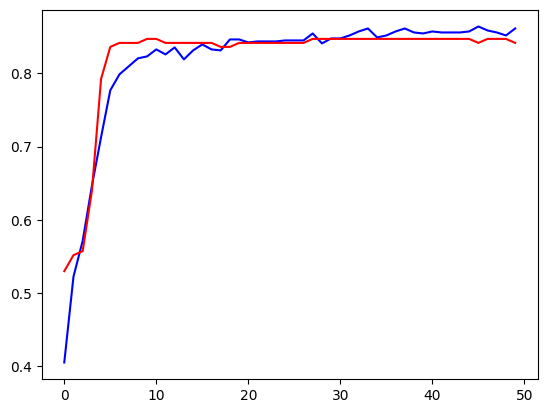

In [51]:
plt.plot(hist.history['accuracy'] , color = 'blue')
plt.plot(hist.history['val_accuracy'] , color = 'red')
plt.show()

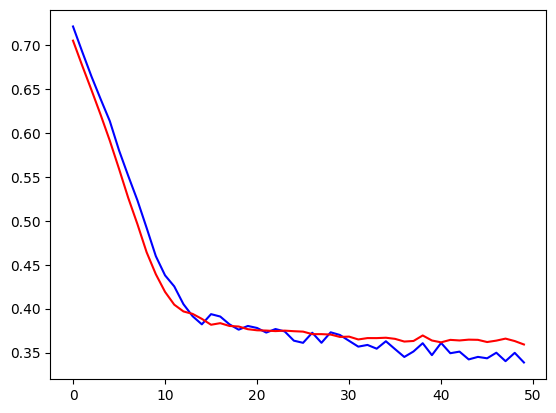

In [52]:
plt.plot(hist.history['loss'] , color = 'blue')
plt.plot(hist.history['val_loss'] , color = 'red')
plt.show()